**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
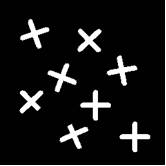
art8lab1.png: 
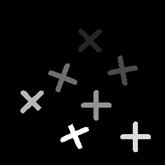
art8lab2.png: 
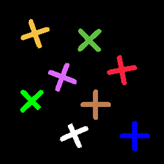
		

In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [3]:
# Caso queira calcular a vizinhança 8, usar esses vizinhos: 
# neighbors = [(cx - 1, cy), (cx + 1, cy), (cx, cy - 1), (cx, cy + 1),(cx - 1, cy - 1), (cx + 1, cy - 1), (cx - 1, cy + 1), (cx + 1, cy + 1)]

def label_connected_components(img):
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    labeled_img = np.zeros_like(img)
    label = 1
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y, x] == 255 and labeled_img[y, x] == 0:
                stack = [(x, y)]
                
                while stack:
                    cx, cy = stack.pop()
                    labeled_img[cy, cx] = label
                    neighbors = [(cx - 1, cy), (cx + 1, cy), (cx, cy - 1), (cx, cy + 1)]
                    for nx, ny in neighbors:
                        if 0 <= nx < img.shape[1] and 0 <= ny < img.shape[0] and img[ny, nx] == 255 and labeled_img[ny, nx] == 0:
                            stack.append((nx, ny))
                
                label += 1
    
    return labeled_img

In [4]:
img = cv2.imread('art8.png', cv2.IMREAD_GRAYSCALE)

labeled_img = label_connected_components(img)

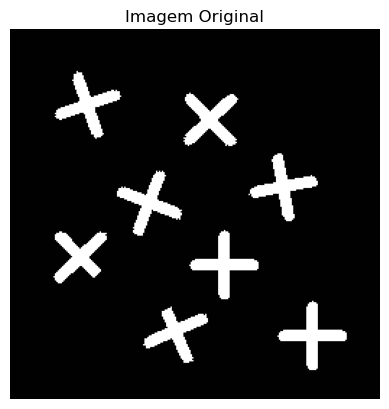

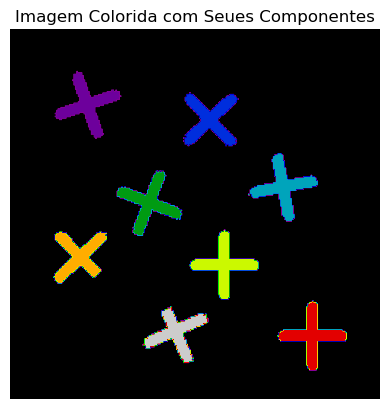

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem Original")
plt.show()

plt.imshow(labeled_img, cmap='nipy_spectral')
plt.axis('off')
plt.title("Imagem Colorida com Seues Componentes")
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [6]:
def binarize_image(img,treshold,max_value):
    test,img= cv2.threshold(img, treshold, max_value, cv2.THRESH_BINARY)
    return img

def count_labeled_componentes(img):

    labeled_img = np.zeros_like(img)
    label = 1
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y, x] == 255 and labeled_img[y, x] == 0:
                stack = [(x, y)]
                while stack:
                    # print(label)
                    cx, cy = stack.pop()
                    labeled_img[cy, cx] = label
                    neighbors =[(cx - 1, cy), (cx + 1, cy), (cx, cy - 1), (cx, cy + 1)]
                    for nx, ny in neighbors:
                        if 0 <= nx < img.shape[1] and 0 <= ny < img.shape[0] and img[ny, nx] == 255 and labeled_img[ny, nx] == 0:
                            stack.append((nx, ny))                
                label += 1
    
    return label, labeled_img

In [11]:
img = cv2.imread('clc3.png', cv2.IMREAD_GRAYSCALE)
img_2=binarize_image(img,treshold=171,max_value=255)
C = np.where(img_2 > 254,0,255)

In [12]:
label,labeled_img = count_labeled_componentes(C)
print((label-1))

226


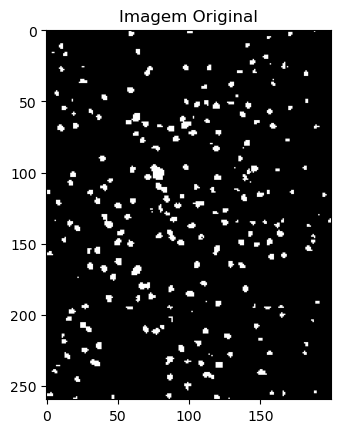

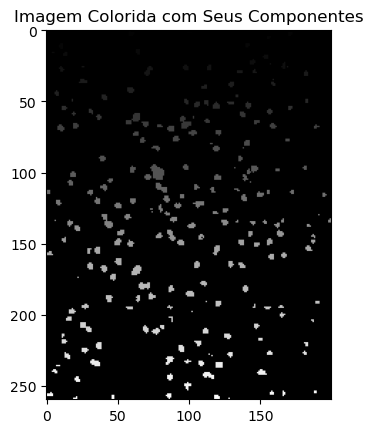

In [14]:
plt.imshow(C,cmap='gray');
plt.title("Imagem Original")
plt.show()

plt.imshow(labeled_img, cmap='gray');
plt.title("Imagem Colorida com Seus Componentes")
plt.show()
